## Final Assignment

### Introduction

## The question is raised:

My question is whether there is a relationship between the protein levels and the fat levels of foods consumed by covid patients
around the world on the rate of active, recovered or dead covid patients? 

In [3]:
#link of datasets:
#https://www.kaggle.com/datasets/mariaren/covid19-healthy-diet-dataset?select=Fat_Supply_Quantity_Data.csv

#Description of datasets:
#I have two datasets containing percentages of protein and fat intake by COVID patients around the world. I select those columns
#that have the greatest impact on consumption protein and fat.


In [4]:

import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import matplotlib.pyplot as plt

## Part 1: Load the data

In [5]:
# load config file
def get_config():
    with open('config5.yaml','r') as strem:
        config5 =yaml.safe_load(strem)
    return config5


config5 = get_config()
fat = config5['fat']
protein = config5['protein']

# read csv data 
df_fat = pd.read_csv(fat)
df_protein = pd.read_csv(protein)

df_fat.head(5)
df_protein.head(5)


df_fat.info()
df_protein.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal Products               170 non-null    float64
 3   Animal fats                   170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Miscellaneous                 170 non-null    float64
 11  Milk - Excluding Butter       170 non-null    float64
 12  Offals                        170 non-null    float64
 13  Oilcr

## Part 2: inspection the data

In [6]:
# missing data analyses


# calculate percentage of missing value in fat dataset
df_fat.isnull().mean()*100
df_fat[df_fat.isnull().any(axis=1)]


# calculate percentage of miss value in protein dataset
df_protein.isnull().mean()*100
df_protein[df_protein.isnull().any(axis=1)]


#The 16 rows in both datasets have missing data, and we do not have any experts to fill in NA, so I decided to drop them with thresh 
#value 30
df_fat_na=df_fat.dropna(axis=0,thresh=30)
df_protein_na=df_protein.dropna(axis=0,thresh=30)



#rename column
df_fat_na=df_fat_na.rename(columns={'Animal Products':'Animal Products_f',
                                    'Animal fats':'Animal fats_f',
                                    'Sugar & Sweeteners':'Sugar & Sweeteners_f',
                                    'Vegetal Products':'Vegetal Products_f',
                                    'Vegetable Oils':'Vegetable Oils_f',
                                    'Deaths':'Deaths_f',
                                    'Recovered':'Recovered_f',
                                    'Active':'Active_f',
                                    'Population':'Population_f'})
#Column selection in fat dataset
df_fat_na=df_fat_na.loc[:,['Animal Products_f',
                    'Animal fats_f',
                    'Sugar & Sweeteners_f',
                    'Vegetal Products_f',
                    'Vegetable Oils_f',
                    'Deaths_f',
                    'Recovered_f',
                    'Active_f',
                    'Population_f',
                    'Country']]

#Column selection in protein dataset
df_protein_na = df_protein_na.loc[:,['Animal Products',
                              'Animal fats',
                              'Sugar & Sweeteners',
                              'Vegetal Products',
                              'Vegetable Oils',
                              'Deaths',
                              'Recovered',
                              'Active',
                              'Population',
                              'Country']]  


                                    
#Datasets final check
print(list(df_protein_na.columns))
print(list(df_fat_na.columns))
df_protein_na.shape
df_fat_na.shape


['Animal Products', 'Animal fats', 'Sugar & Sweeteners', 'Vegetal Products', 'Vegetable Oils', 'Deaths', 'Recovered', 'Active', 'Population', 'Country']
['Animal Products_f', 'Animal fats_f', 'Sugar & Sweeteners_f', 'Vegetal Products_f', 'Vegetable Oils_f', 'Deaths_f', 'Recovered_f', 'Active_f', 'Population_f', 'Country']


(164, 10)

## Part 3: The data wrangling 

In [7]:

#merging protein dataset with fat dataset on country
df_patient = pd.merge(df_protein_na,df_fat_na,on='Country')
df_patient.head(5)
df_patient.shape


#dropping dublicats data
df_patient_dub= df_patient.drop_duplicates()
print(df_patient.shape,df_patient_dub.shape)

#Check the correlation between each column by recovered and dead patients
print(df_patient['Animal Products_f'].corr(df_patient['Recovered_f']))
print(df_patient['Animal fats_f'].corr(df_patient['Recovered_f']))
print(df_patient['Sugar & Sweeteners_f'].corr(df_patient['Recovered_f']))
print(df_patient['Vegetal Products_f'].corr(df_patient['Recovered_f']))
print(df_patient['Vegetable Oils_f'].corr(df_patient['Recovered_f']))
print(df_patient['Animal Products'].corr(df_patient['Recovered']))
print(df_patient['Sugar & Sweeteners'].corr(df_patient['Recovered']))
print(df_patient['Vegetal Products'].corr(df_patient['Recovered']))
print(df_patient['Vegetable Oils'].corr(df_patient['Recovered']))
print(df_patient['Animal fats'].corr(df_patient['Recovered']))
print(df_patient['Animal Products_f'].corr(df_patient['Deaths_f']))
print(df_patient['Animal fats_f'].corr(df_patient['Deaths_f']))
print(df_patient['Sugar & Sweeteners_f'].corr(df_patient['Deaths_f']))
print(df_patient['Vegetal Products_f'].corr(df_patient['Deaths_f']))
print(df_patient['Vegetable Oils_f'].corr(df_patient['Deaths_f']))

#select high levels correlation factors for visulization:
#Animal Products_f(from fat dataset),Animal fats_f,Vegetal Products_f,Vegetable Oils_f,Animal Products,Vegetal Products,Animal fats,
#have high correlation with recoverd patient and between Animal Products_f,Animal fats_f,Vegetal Products_f,Vegetable Oils_f with death
#patient have high correlation

(164, 19) (164, 19)
0.40383167802724634
0.45610069803188963
-0.057534128168642375
-0.4038696145740695
-0.1571857019912298
0.40331983021807294
0.11918280689384746
-0.4033131326799874
0.18890683070395398
0.3597050759278262
0.4415137642242007
0.5193210566673092
-0.0697472012682272
-0.4415539985979649
-0.1052658296080774


## Part 4: Data visualization

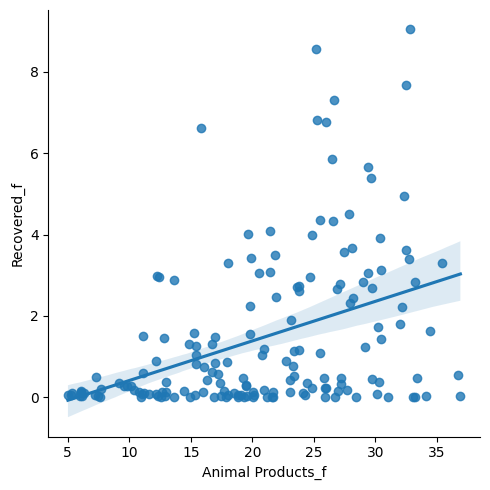

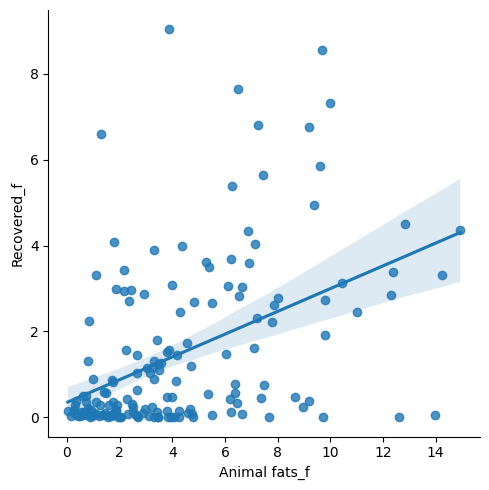

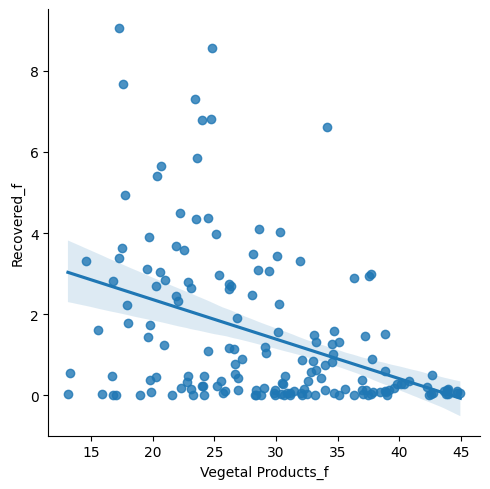

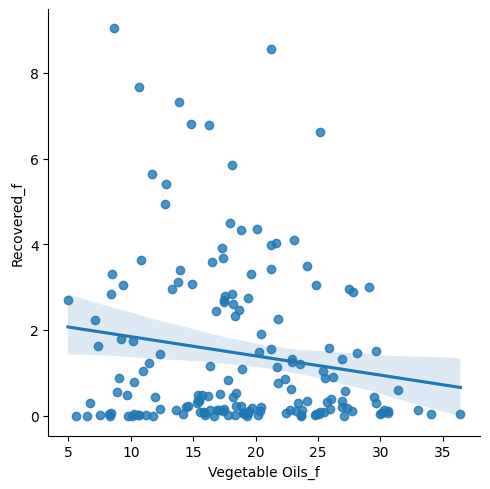

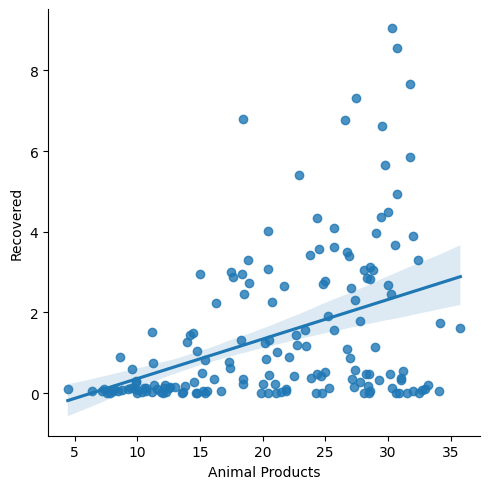

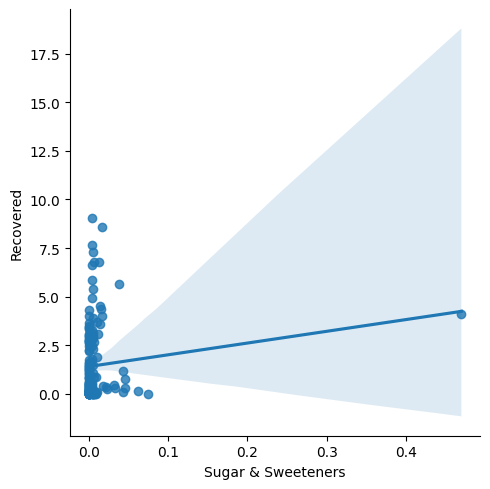

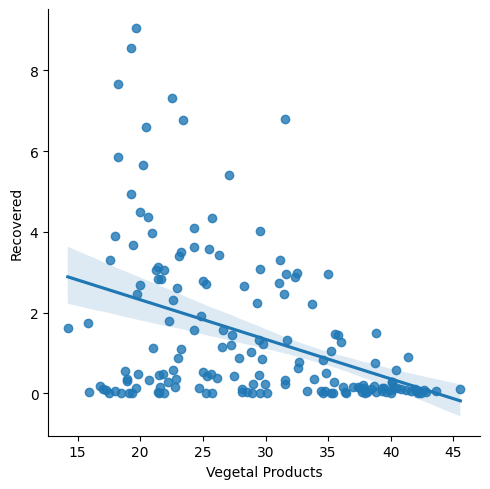

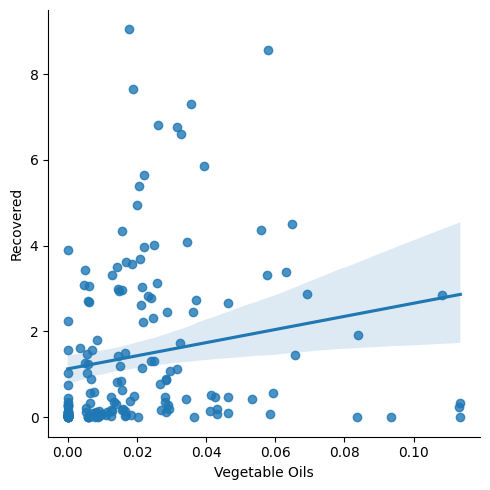

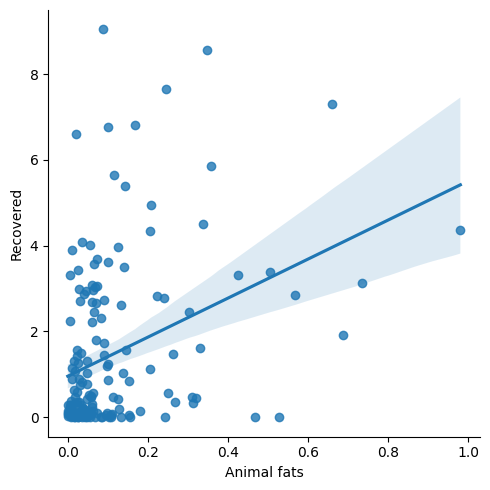

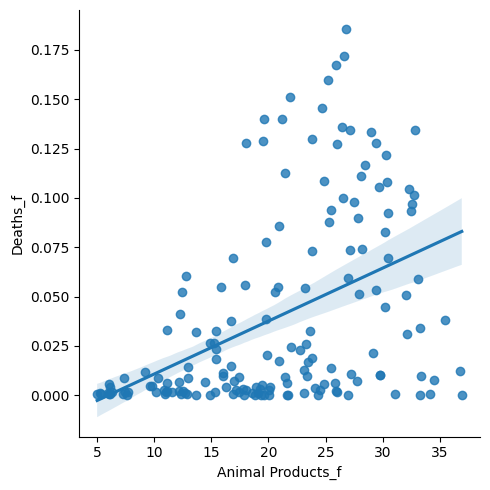

In [8]:
sns.lmplot(x="Animal Products_f", y="Recovered_f" ,data= df_patient)
sns.lmplot(x="Animal fats_f", y="Recovered_f" ,data= df_patient)
sns.lmplot(x="Vegetal Products_f", y="Recovered_f" ,data= df_patient)
sns.lmplot(x="Vegetable Oils_f", y="Recovered_f" ,data= df_patient)
sns.lmplot(x="Animal Products", y="Recovered" ,data= df_patient)
sns.lmplot(x="Sugar & Sweeteners", y="Recovered" ,data= df_patient)
sns.lmplot(x="Vegetal Products", y="Recovered" ,data= df_patient)
sns.lmplot(x="Vegetable Oils", y="Recovered" ,data= df_patient)
sns.lmplot(x="Animal fats", y="Recovered" ,data= df_patient)
sns.lmplot(x="Animal Products_f", y="Deaths_f" ,data= df_patient)

C:\Users\Asus\AppData\Local\Temp\ipykernel_19028\4176886992.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_patient.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.5, ax=ax)


Text(0.5, 1.0, 'Correlation between fat and protein factors')

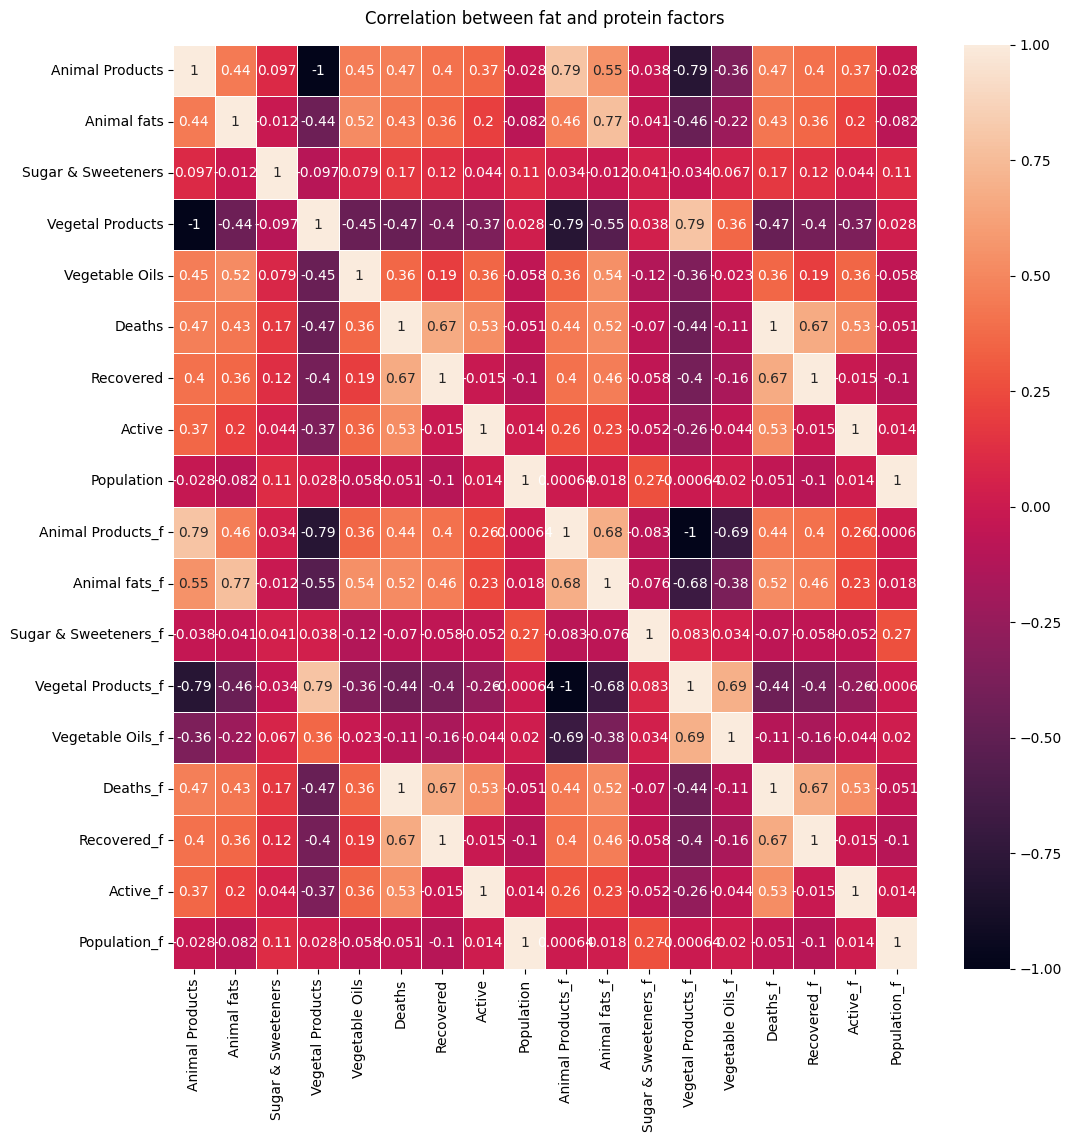

In [9]:
#heatmaping between columns
fig, ax = plt.subplots(figsize=(12,12)) 
heatmap = sns.heatmap(df_patient.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.5, ax=ax)

heatmap.set_title('Correlation between fat and protein factors', fontdict={'fontsize':12}, pad=15)